In [36]:
# Data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values
from sklearn.impute import KNNImputer

from scipy.stats import chi2_contingency

# Feature engineering
from sklearn.preprocessing import StandardScaler

# Model processing and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [4]:
df = df.drop('id', axis=1) #id column not necessary


In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
df.shape

(569, 31)

In [6]:
df.diagnosis = [1 if i == "M" else 0 for i in df.diagnosis]


In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']


In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
cr = classification_report(y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



/Users/sharmin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 3))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_log), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_log), 3))

Precision Score:  0.918
Recall Score:  0.957
F1 Score:  0.938
Accuracy Score:  0.947
ROC AUC:  0.949


In [14]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [49]:
print('Precision Score: ', round(precision_score(y_test, y_pred_rf), 3))
print('Recall Score: ', round(recall_score(y_test, y_pred_rf), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_rf), 4))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_rf), 3))

Precision Score:  0.938
Recall Score:  0.957
F1 Score:  0.947
Accuracy Score:  0.9561
ROC AUC:  0.956


In [16]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [17]:
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_knn), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_knn), 2))

Precision Score:  0.92
Recall Score:  0.94
F1 Score:  0.926
Accuracy Score:  0.94
ROC AUC:  0.94


# svm

In [18]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
cr_svm = classification_report(y_test, y_pred_knn)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [19]:
print('Precision Score: ', round(precision_score(y_test, y_pred_svm), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_svm), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_svm), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_svm), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_svm), 3))

Precision Score:  0.98
Recall Score:  0.85
F1 Score:  0.909
Accuracy Score:  0.93
ROC AUC:  0.918


In [20]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        67
           1       0.85      0.96      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [21]:
print('Precision Score: ', round(precision_score(y_test, y_pred_dt), 3))
print('Recall Score: ', round(recall_score(y_test, y_pred_dt), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_dt), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_dt), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_dt), 2))

Precision Score:  0.849
Recall Score:  0.96
F1 Score:  0.9
Accuracy Score:  0.91
ROC AUC:  0.92


In [23]:
from sklearn.naive_bayes import GaussianNB
bx = GaussianNB()
bx.fit(x_train, y_train)
y_pred_bx = bx.predict(x_test)
cr_bx = classification_report(y_test, y_pred_bx)
print(cr_bx)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [24]:
print('Precision Score: ', round(precision_score(y_test, y_pred_bx), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_bx), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_bx), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_bx), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_bx), 2))

Precision Score:  0.91
Recall Score:  0.915
F1 Score:  0.915
Accuracy Score:  0.93
ROC AUC:  0.93


In [25]:
from sklearn.ensemble import AdaBoostClassifier


In [26]:
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
y_pred_ad = ad.predict(x_test)
cr_ad = classification_report(y_test, y_pred_ad)
print(cr_ad)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [29]:
print('Precision Score: ', round(precision_score(y_test, y_pred_ad), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_ad), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_ad), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_ad), 4))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_ad), 2))

Precision Score:  0.96
Recall Score:  0.936
F1 Score:  0.946
Accuracy Score:  0.9561
ROC AUC:  0.95


# roc curve of ada boost

In [41]:
auc_ad = roc_auc_score(y_test, y_pred_ad)
auc_ad

0.9531597332486503

In [42]:
cm_ad = confusion_matrix(y_test, y_pred_ad)
cm_ad

array([[65,  2],
       [ 3, 44]])

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

predicted_probab_ad = ad.predict_proba(x_test)
predicted_probab_ad = predicted_probab_ad[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, predicted_probab_ad)

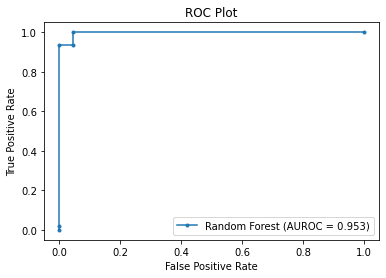

In [47]:
from matplotlib import pyplot
pyplot.plot(fpr2, tpr2, marker='.', label='Random Forest (AUROC = %0.3f)'% auc_ad)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()